<a href="https://colab.research.google.com/github/RodrigoTito/Segmenta-o-de-cliente/blob/main/Segmenta%C3%A7%C3%A3o_de_cliente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Segmentação de cliente


*Uma empresa tem planos de entrar em novos mercados com seus produtos existentes **(P1, P2, P3, P4 e P5)**. Após intensa pesquisa de mercado, eles deduziram que o comportamento do novo mercado é semelhante ao mercado existente.* 

*Em seu mercado existente, a equipe de vendas classificou todos os clientes em **4** segmentos **(A, B, C, D)**. Em seguida, eles realizaram divulgação e comunicação segmentada para diferentes segmentos de clientes. Essa estratégia funcionou excepcionalmente bem para eles. Eles planejam usar a mesma estratégia em novos mercados e identificaram **2627** novos clientes em potencial.* 

**O objetivo é ajudar a equipe de marketing prever o grupo certo de novos clientes.**

## Importações

In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 * **Leitura de dados**

In [406]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Investigando os dados

*  **Visualizando as primeiras 5 linhas do conjunto de dados de treino**

In [407]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


* **Descrição de dados** 

Variable   | Definition | Definição 
--------- | ------| ------
ID        | Unique ID | ID único
Gender    | Gender of the customer | Sexo do cliente
Ever_Married | Marital status of the customer| Estado civil do cliente
Age | Age of the customer| Idade do cliente
Graduated |	Is the customer a graduate?| 	O cliente é graduado?
Profession |	Profession of the customer| Profissão do cliente
Work_Experience |	Work Experience in years| Experiência Profissional em anos
Spending_Score|	Spending score of the customer| 	Pontuação de gastos do cliente
Family_Size|	Number of family members for the customer (including the customer)| Número de membros da família para o cliente (incluindo o cliente)
Var_1|	Anonymised Category for the customer| Categoria anônima para o cliente
Segmentation|	(target) Customer Segment of the customer| 	(alvo) Segmento de cliente 

* **Informações de cada variável do conjunto de dados de treino**

In [408]:
df_aux = pd.DataFrame({'Type': train.dtypes,
                      'Missing': train.isna().sum(),
                      'Size': train.shape[0],
                       'Unique': train.nunique()
                     })
df_aux['Missing_%']= df_aux.Missing/df_aux.Size * 100
df_aux.sort_values(by='Missing_%', ascending=False)

,Type,Missing,Size,Unique,Missing_%
Work_Experience,float64,829,8068,15,10.275161
Family_Size,float64,335,8068,9,4.152206
Ever_Married,object,140,8068,2,1.735250
Profession,object,124,8068,9,1.536936
Graduated,object,78,8068,2,0.966782
Var_1,object,76,8068,7,0.941993
ID,int64,0,8068,8068,0.000000
Gender,object,0,8068,2,0.000000
Age,int64,0,8068,67,0.000000
Spending_Score,object,0,8068,3,0.000000


Tipos de variáveis:

* Categóricas nominais: **Gender, Ever_Married e Var_1 ;**

* Categóricas ordinais: **Graduated, Profession, Spending_Score, Segmentation;**

* Numéricas: **ID, Age, Work_Experience e Family_Size**

* **Estatística Descritiva**

In [409]:
train.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


## Visualizações

In [410]:
def grafico_com_porcetagem_1(g):
    g.ax.set_ylim(0,100)
    for p in g.ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        g.ax.annotate('{:.2f}%'.format(p.get_height()), (x, y+2), ha='center')
    return g

**Vamos visualizar a relação dos atributos "Segmentação" x "score de gasto".**

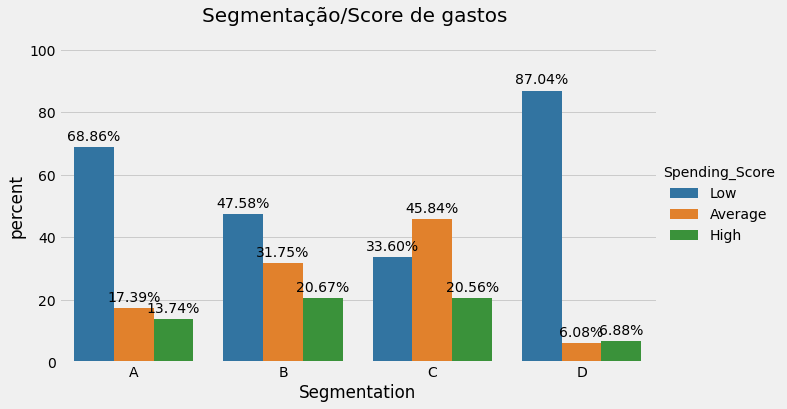

In [411]:
df = train.groupby('Segmentation')['Spending_Score'].value_counts(normalize=True)*100
df = df.rename('percent').reset_index()#.sort_values(by=['percent'], ascending = True)

g = sns.catplot(x='Segmentation',y='percent',hue='Spending_Score',kind='bar',data=df, height=5,aspect = 1.8,palette="tab10")
grafico_com_porcetagem_1(g)
plt.title('Segmentação/Score de gastos \n', fontsize=20)
plt.show()

**Comportamento com o sexo:**


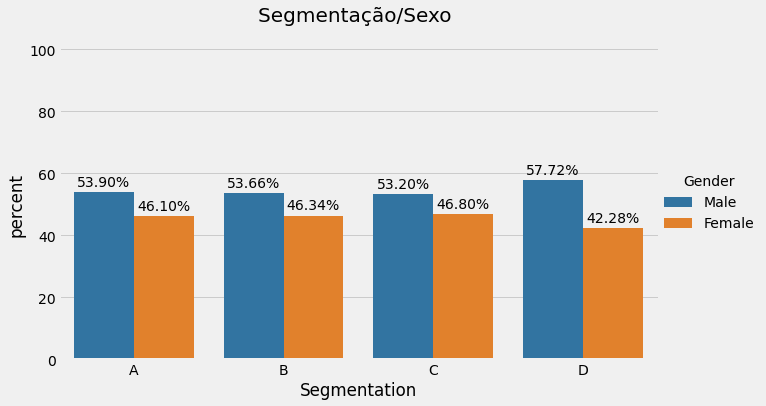

In [412]:
df = train.groupby('Segmentation')['Gender'].value_counts(normalize=True)*100
df = df.rename('percent').reset_index()#.sort_values(by=['percent'], ascending = True)

g = sns.catplot(x='Segmentation',y='percent',hue='Gender',kind='bar',data=df, height=5,aspect = 1.8,palette="tab10")
grafico_com_porcetagem_1(g)
plt.title('Segmentação/Sexo \n', fontsize=20)
plt.show()

**Comportamento da graduação:**


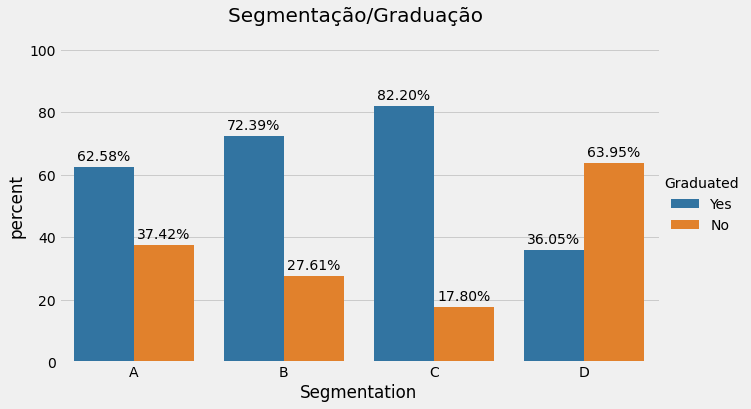

In [413]:
df = train.groupby('Segmentation')['Graduated'].value_counts(normalize=True)*100
df = df.rename('percent').reset_index()#.sort_values(by=['percent'], ascending = True)

g = sns.catplot(x='Segmentation',y='percent',hue='Graduated',kind='bar',data=df, height=5,aspect = 1.8,palette="tab10")
grafico_com_porcetagem_1(g)
plt.title('Segmentação/Graduação \n', fontsize=20)
plt.show()

**Comportamento com a idade:**

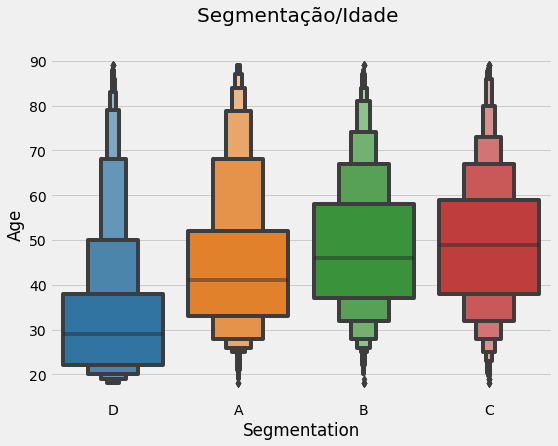

In [414]:
plt.figure(figsize=(8,6))
sns.boxenplot(x='Segmentation',y='Age',data=train,palette="tab10")
plt.title('Segmentação/Idade \n', fontsize=20)
plt.show()

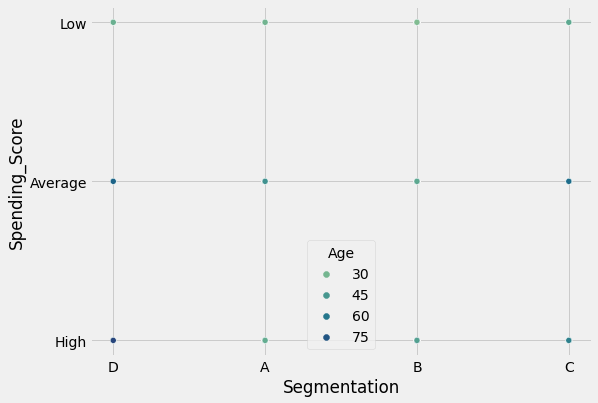

In [415]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=train, x="Segmentation", y="Spending_Score", hue="Age", palette='crest')
plt.show()

 **Comportamento  número de membros da família:**

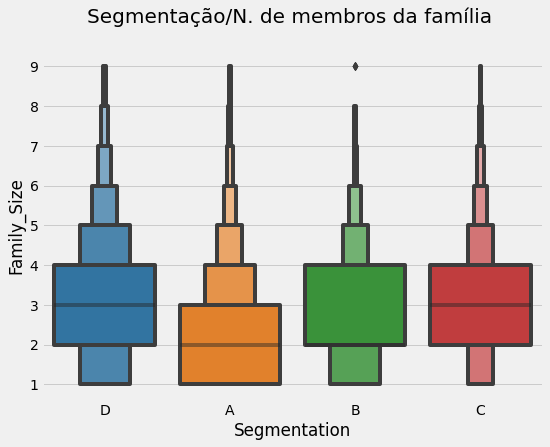

In [416]:
plt.figure(figsize=(8,6))
sns.boxenplot(x='Segmentation',y='Family_Size',data=train,palette="tab10")
plt.title('Segmentação/N. de membros da família \n', fontsize=20)
plt.show()

**Comportamente do score de gasto com a graduação:**

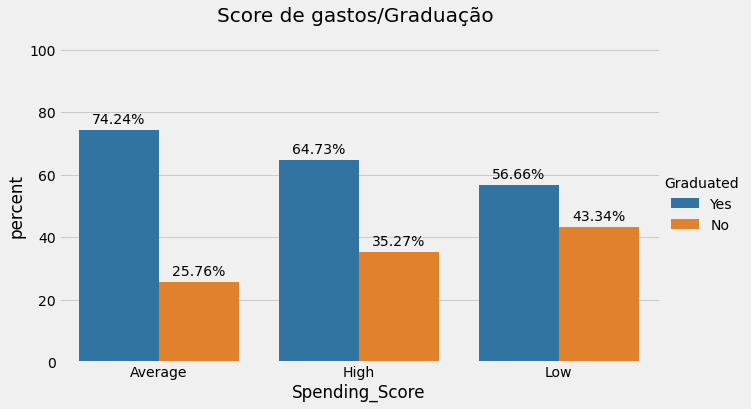

In [417]:
df = train.groupby('Spending_Score')['Graduated'].value_counts(normalize=True)*100
df = df.rename('percent').reset_index()#.sort_values(by=['percent'], ascending = True)

g = sns.catplot(x='Spending_Score',y='percent',hue='Graduated',kind='bar',data=df, height=5,aspect = 1.8,palette="tab10")
grafico_com_porcetagem_1(g)
plt.title('Score de gastos/Graduação \n', fontsize=20)
plt.show()

## Transformação e Limpeza dos dados 

* **Preenchendo os dados ausentes dos conjuntos de treino e teste** 

In [418]:
for i, df in enumerate([train, test]):
    # Preenchendo os dados ausentes das variáveis categóricas 
    df['Ever_Married'].fillna(df['Ever_Married'].mode()[0],inplace = True)
    df['Profession'].fillna(df['Profession'].mode()[0],inplace = True)
    df['Graduated'].fillna(df['Graduated'].mode()[0],inplace = True)
    df['Var_1'].fillna(df['Var_1'].mode()[0],inplace = True)
    # Preenchendo os dados ausentes das variáveis  numéricas
    df['Work_Experience'].fillna(df['Work_Experience'].median(),inplace = True)
    df['Family_Size'].fillna(df['Family_Size'].mode()[0],inplace = True)

* **Separando a variável resposta das variáveis preditoras**

In [419]:
X = train.drop(['ID','Segmentation'], axis = 1)
y = train.Segmentation
test_X = test.drop(['ID'], axis = 1)

* **Colocando o peso na variável pontuação de gastos**

In [420]:
X['Spending_Score'].replace({'Low':1,'Average':2,'High':3},inplace=True)
test_X['Spending_Score'].replace({'Low':1,'Average':2,'High':3},inplace=True)

* **Transformando a variável resposta**

In [421]:
y.replace({'A':1,'B':2,'C':3,'D':4},inplace=True)

* **Criando variáveis fictícias para as variáveis categóricas**

In [422]:
X = pd.get_dummies(X)
test_X =  pd.get_dummies(test_X)

* **Dividindo o conjunto de treinamento**

In [423]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test =  train_test_split(X,y, test_size = 0.33)

## Importando os modelos

In [357]:
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV
from lightgbm import LGBMClassifier
import datetime
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import accuracy_score

## Treinando os medelos

In [237]:
execution_results = []
# Definindo os modelos:
# [modelo, * dict * com parâmetros a serem testados, * lista * de UM item com o redimensionador a ser usado]
modelos = ['RidgeClassifierCV','RandomForestClassifier',
          'LGBMClassifier']
score_model = [] # Acurácia
MSE = [] # Erro quadrático médio
measured_time_train = []
models = [
    [RidgeClassifierCV(), {}, [Normalizer()]],
    [RandomForestClassifier(n_estimators=50), {}, [Normalizer()]],
    [LGBMClassifier(earning_rate=0.02,
                    boosting_type='gbdt', max_depth=4,  objective='multiclass', 
                    random_state=100,  
                  n_estimators=1000 ,reg_alpha=0, reg_lambda=1, n_jobs=-1), {}, [Normalizer()]],
]

best_score = 9999999999999
best_clf = None

def loss_func(y_true, y_predicted):
    return mean_squared_error(y_true, y_predicted, squared=False)

score = make_scorer(loss_func, greater_is_better=False)

for classifier in models:
    print("Training {}...".format(type(classifier[0]).__name__))
    begin_time = datetime.datetime.now()

    clf=classifier[0].fit(X_train, y_train) 
    msd_time_train = datetime.datetime.now() - begin_time
    measured_time_train.append(format(msd_time_train))
    # Prever com o conjunto de teste
    begin_time = datetime.datetime.now()
    y_pred = clf.predict(X_test)
    # Calculando o tempo decorrido 
    measured_time_test = datetime.datetime.now() - begin_time
    # Calculando erro quadrático médio 
    error = mean_squared_error(y_test, y_pred, squared=False)
    MSE.append(error)
    # Calculando a acurácia
    score = accuracy_score(y_test, y_pred)
    score_model.append(score)
    if error < best_score:
        best_score = error
        best_clf = clf

Training RidgeClassifierCV...
Training RandomForestClassifier...
Training LGBMClassifier...


## Resultados dos modelos

In [238]:
md = pd.DataFrame({'modelos': modelos,
                   'mse': MSE,
                   'score':score_model,
                   'tempo decorrido de treinamento':measured_time_train})
md.sort_values(['mse', 'score'])

,modelos,mse,score,tempo decorrido de treinamento
2,LGBMClassifier,1.308570,0.511078,0:00:02.336469
1,RandomForestClassifier,1.317578,0.489673,0:00:00.416049
0,RidgeClassifierCV,1.360899,0.481412,0:00:00.022297


In [239]:
print("A melhor pontuação foi {} por clf {}".format(best_score, str(best_clf)))

A melhor pontuação foi 1.308569634150282 por clf LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               earning_rate=0.02, importance_type='split', learning_rate=0.1,
               max_depth=4, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=1000, n_jobs=-1, num_leaves=31,
               objective='multiclass', random_state=100, reg_alpha=0,
               reg_lambda=1, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


* **Fazendo pevisão com o conjunto de dados X_test**

In [240]:
y_pred = best_clf.predict(X_test)

* **Verificando quão bom é o modelo para o conjunto de dados X_test**

In [241]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.41      0.45      0.43       665
           2       0.40      0.33      0.36       624
           3       0.52      0.56      0.54       606
           4       0.67      0.67      0.67       768

    accuracy                           0.51      2663
   macro avg       0.50      0.50      0.50      2663
weighted avg       0.51      0.51      0.51      2663



* **Visualizando a matriz de confusão**

In [242]:
print(confusion_matrix(y_test, y_pred))

[[300 149  87 129]
 [165 203 194  62]
 [ 93 107 340  66]
 [171  44  35 518]]


In [243]:
target = best_clf.predict(test_X)
res = pd.DataFrame(target)
res.columns = ["prediction"]

* **Convertendo os valores 1:4 para A:D**

In [244]:
res['prediction'].replace({1:'A',2:'B',3:'C',4:'D'},inplace=True)

* **Inserindo a previsão do modelo do conjunto de dados test para submissão**

In [257]:
submission = pd.DataFrame({'ID': test['ID'], 'Segmentation':res['prediction']})
submission.head()

,ID,Segmentation
0,458989,B
1,458994,C
2,458996,C
3,459000,C
4,459001,D


## Entregável - Salvando os resultados finais

In [261]:
from google.colab import files
submission.to_csv('sample_submission.csv',index=False)         

In [262]:
pd.read_csv('sample_submission.csv').head()

,ID,Segmentation
0,458989,B
1,458994,C
2,458996,C
3,459000,C
4,459001,D


## Agrupamento de Dados

Nesta seção exploramos:

* Seleção dos dados.
* k-Means.

* **Seleção dos dados**

In [424]:
df = pd.concat([X,test_X])
df.sample(3)

,Age,Work_Experience,Spending_Score,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
7741,59,0.0,1,1.0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
7305,49,6.0,2,2.0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6814,35,3.0,2,2.0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## k-Means

O algoritmo $KMeans$ agrupa os dados tentando separar amostras em  $k$ grupos de variância igual, minimizando a distância intercluster e maximizando a distância intracluster. 

* **Importando o modelo**

In [425]:
from sklearn.cluster import KMeans

* **Identificar os k grupos de clientes para particionar os dados.**

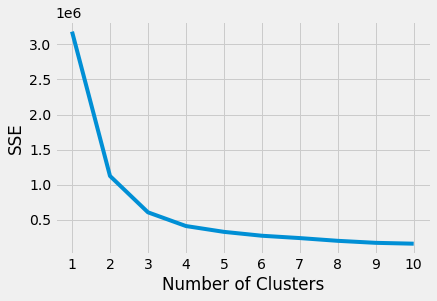

In [426]:
kmeans_kwargs = {"init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [427]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print('k =',kl.elbow)

k = 3


In [428]:
model = KMeans(n_clusters = 3)
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [429]:
Train = pd.concat([train.iloc[:,:-1],test])
Train['Group'] = model.predict(df)
Train.sample(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Group
2238,466634,Male,No,20,No,Healthcare,1.0,Low,5.0,Cat_6,2
1639,464580,Male,No,32,No,Artist,9.0,Low,4.0,Cat_6,2
4687,460464,Male,No,27,Yes,Artist,9.0,Low,2.0,Cat_3,2


* **Visualizando os Grupos**

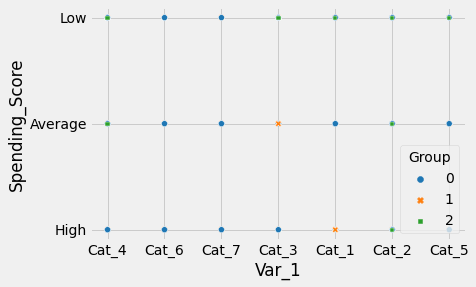

In [437]:
sns.scatterplot(data=Train, x="Var_1", y="Spending_Score", hue='Group',
                style='Group', palette='tab10')
plt.show()

## Características dos Grupos


In [486]:
val_X =Train[['Spending_Score','Group']] 
val_X['Spending_Score'].replace({'Low':1,'Average':2,'High':3},inplace=True)
val = val_X.groupby('Group').describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


* **Removendo alguns atributos**

In [488]:
spending_score = val['Spending_Score'].drop(['std','25%','50%','75%'], axis = 1)
val = spending_score
val.columns = ['Count','Score Mean', 'Score Min', 'Score Max']

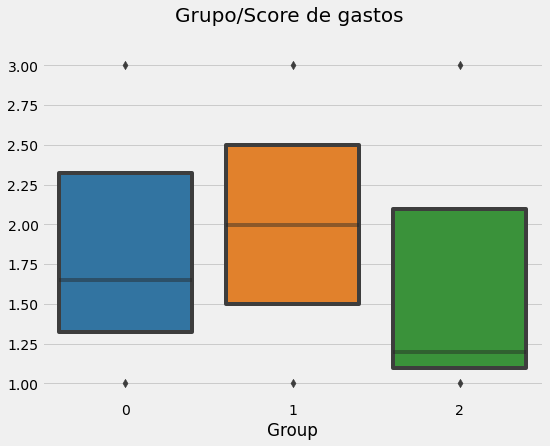

In [494]:
plt.figure(figsize=(8,6))
sns.boxenplot(data=val.iloc[:,1:].transpose(),palette="tab10")
plt.title('Grupo/Score de gastos \n', fontsize=20)
plt.show()

* **Discussão k-Means**

*O k-Means  particionou os dados em $3$ grupos bem visiveis.*

*Suas características podem ser descritas como segue:*

* *Grupo 0 - Tem em média score intermediário.*
* *Grupo 1 - Tem em média score alto. (interessante)*
* *Grupo 2 - Tem em média score baixo.*

### Avaliação - Silhouette

$Silhouette$ é uma métrica de interpretação e validação de algoritmos de agrupamento de dados, avaliando a consistência dentro dos grupos. Quanto maior (mais próximo de 1) a silhouette melhor a divisão dos grupos. 

* **Importando a métrica**

In [323]:
from sklearn.metrics import silhouette_score

In [453]:
silhouette_score(df, Train['Group'])

0.4699948851624406

## Entregável - Salvando os resultados finais

In [510]:
Train.rename(columns={'Group':'Segmento'},inplace=True)
Train.Segmento.replace({0:'potencialmente valioso',1:'valioso',2:'precisa de atenção'},inplace=True)
Train.to_csv('resultado_final.csv',index=False)  

In [511]:
pd.read_csv('resultado_final.csv').head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmento
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,precisa de atenção
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,potencialmente valioso
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,valioso
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,valioso
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,potencialmente valioso
